## Final Project Submission

Please fill out:
* Student name: Bernadette Wanjiku Nganga
* Student pace:  Part time 
* Scheduled project review date/time: 21/07/2023
* Instructor name: Maryann Mwikali
* Blog post URL:

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

# A Data Analysis of Movie Popularity, Profitability, Genres, and Director Success.

Author: Bernadette Wanjiku Nganga

# Overview

The project seeks to identify the key factors contributing to a movie's success and understand what the target prefer.Utilizing data analysis methods ,explore the data using EDA(Explanatory Data Analysis),vizualize using (Bar Charts,Scatter
Plots),and correlations between the variables .The results will provide Microsoft New Studios with actionable recommendations
to optimize movie selection and marketing strategies, leveraging successful genres, directors, and release dates to maximize box office revenue and cater to audience preferences


# Business Problem

The business problem at hand is to analyze how the Microsoft studio will improve its movie selection and marketing strategies to maximize box office revenue. I want to identify key factors that contribute to a movie's success and understand the preferences of their target audience. Also, I want to analyze the impact of movie genre, director, and ratings on the movie's popularity and financial performance.
Here are the questions that will take us through the process:



  1.  Which genre of movie is profitable?
  2.  Does the release date affect the Popularity and Reception of the movie?
  3.  Who are the most successful directors in terms of box office revenue?
  4.  Does popularity result in high votes?

# Data Understanding

The dataset is from The Movie DB website ,Rotten tomatoes and Box Office Mojo which are platforms that hosts all types of movies for audiences to access.The datsets are rt.movies_info.csv, tmdb.movies.csv and bom.movies_gross.csv

    1. rt.movies_info.csv:

Source:    Rotten Tomatoes 


Data Relation: Dataset includes information on various movies, such as their synopsis, rating, genre, director, writer, theater_date, DVD_date, box_office, runtime, and studio.


Represented Sample: Each row in the "rt_movies_info.csv" dataset represents a unique movie, and the variables contain details related to that movie, including its attributes and financial performance.

Target Variable: The "Genre" column  represents the target variable, which indicates the genre for each movie and the 'director'column which indicate the directors of the movie.


Properties of Variables: The variables include both categorical (e.g., genre, rating) and numerical data (e.g., box_office,
runtime). Some variables have missing values represented as NaN.

    2.tmdb.movies.csv:
Source: The Movie DB

Data Relation:  Dataset includes information on title,original_title,genre_ids,original_language,popularity,release_date,vote_average,and vote_count


Represented Sample:  Each row represents a movie entry with information related to its genre, release date, popularity, and voting counts.


Target Variable: The 'popularity' ,'release_date' and 'vote_counts' columns are my target variables.

Properties of Variables: The variables include Categorical Variables(title,original_title,id, genre_ids, original_language, representing movie titles, genres, and languages.), Numerical Variables(popularity, vote_average, vote_count, representing measures of movie popularity and audience ratings.)and Time-based variable: release_date

    3.bom.movie_gross.csv
    
- Source: Box Office Mojo
- Data Relation: The "bom.movie_gross" dataset includes information such as the title, studio, domestic gross revenue, foreign gross revenue, and the year of release.

- Represented Sample: Each row  represents a specific movie title with details of its box office performance and the studio's involvement.

- Target Variable: "domestic_gross" column is my target variable which represents the movie's gross revenue 

- Properties of Variables: The dataset includes both categorical (e.g., title, studio) and numerical data (e.g., domestic_gross, foreign_gross, year). 




 The merging of these datasets(rt.movies and tmdb.movies) based on the "id" column allows for a more indepth analysis of factors contributing to movie success, including genre, ratings, and financial performance. Understanding and merging dataset(bom.movie_gross and rt.movie) will allow us to analyze movie gross patterns, identify successful studios, and explore the box office performance of individual movies over the years.

# Exploring the Data

In [2]:
#Loading the modules needed
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1.RT.Movie

Let's begin with the dataset rt.movie_info.csv

In [3]:
#Opening the tsv file
# Adding the data type of the column "column_name" as a string,
rt_df = pd.read_csv('rt.movie_info.tsv', delimiter='\t', dtype={'column_name': str})
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
#Checking the columns in the data
rt_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [5]:
#Checking the information of the data
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [6]:
#Checking the data types
rt_df.dtypes 

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [7]:
#Checking the shape of the data
rt_df.shape

(1560, 12)

# 2.TMDB.Movies

Now let's check the dataset tmdb.movies.csv

In [8]:
#Opening the file
tmdb_df = pd.read_csv('tmdb.movies.csv')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
#Number of rows and columns
tmdb_df.shape

(26517, 10)

In [10]:
#Checking the information
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
#Checking how the columns are written 
#Incase of any whitespaces
tmdb_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [12]:
#Checking the data types
tmdb_df.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

# 3.BOM.Movie

Lastly,Let's look at bom.movie_gross.csv file

In [13]:
#Opening the csv file
bom_df = pd.read_csv('bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
#Checking the information of the dataset
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
#Checking the shape of the data 
bom_df.shape

(3387, 5)

In [16]:
#Checking the columns
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

# Data Preparation

After accessing the data, I noticed some missing values, columns and rows that need to be dropped. The decison to do so is inorder to have clean data that I only need according to my business problem.
Let's go ahead and clean

I'll start with rt_df dataset

In [17]:
#Checking the rt_df data
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [18]:
#Checking the sum of the missing values 
rt_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

There is alot to clean.From my observation above,'currency','box_office','studio' columns has high number of missing values. Our target variable from this dataset is Genre and Director .Therefore  the 3 columns can be dropped.

In [19]:
#Dropping the columns currency,box_office and studio
drop_columns = ['currency', 'box_office', 'studio']
rt_df.drop(columns=drop_columns,inplace=True)

In [20]:
#Checking the data
rt_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


Let's now deal with the rest of the missing data

In [21]:
#Checking the sum of the missing values 
rt_df.isna().sum()

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime          30
dtype: int64

In [22]:
#Let's drop the missing values from the rows 
rt_df.dropna(inplace=True)

In [23]:
rt_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes
...,...,...,...,...,...,...,...,...,...
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",98 minutes
1550,1990,A hard-working Sicilian heads for Switzerland ...,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,"Jun 1, 1974","May 2, 2005",112 minutes
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",116 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes


In [24]:
#Checking the missing values
rt_df.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [25]:
#Checking for duplicated 
rt_df.duplicated().value_counts()

False    881
dtype: int64

Now the rt.movies_info data is clean. Lets check the tmdb.movie dataset

In [26]:
#Checking the data
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The column('Unnamed: 0) is not needed since we already have the indexes for each record

In [27]:
#Removing the Unnamed:0 column
tmdb_df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [28]:
#Checking the changes
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [29]:
#Checking missing data
tmdb_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [30]:
#Checking for duplicates
tmdb_df.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [31]:
#Removing duplicates
tmdb_df.drop_duplicates(inplace=True)


In [32]:
#ReChecking the duplicates
tmdb_df.duplicated().value_counts()

False    25497
dtype: int64

Lastly, lets check the bom_df dataset.

In [33]:
#Checking the information of the dataset
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [34]:
#Checking the missing values
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [35]:
#Dropping the foreign_gross column
bom_df.drop(columns='foreign_gross',inplace=True)

In [36]:
#Rechecking the columns
bom_df.isna().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [37]:
#Dropping the missing values rows
bom_df.dropna(inplace=True)

In [38]:
bom_df.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [39]:
bom_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


Now the three datasets are clean. They are ready for analysis. As seen above , I removed the currency,box_office and studio columns from the rt_df dataset. They had a large number of missing values compared to what was expected.Afterwards,the rows with missing values i went ahead and drop them.From the rt_df dataset ,the target variables are Genre and Director which are still in the dataset.

For the tmdb_df, there were no missing values. There was a column(Unnamed:0) which was not needed because the rows were already index ,therefore the column was dropped. There were duplicates and they were removed as well.

Lastly, for the bom_df, column('foreign_gross') was dropped since it had alot of missing values.It will not be needed since my target variable is domestic_gross .The rows with missing values were also removed.

# Data Modelling

# Exploratory Data Analysis (EDA)

In [40]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes


Now we can go ahead and analyze after cleaning.From my dataset ,I will go through the variables and later on answer some questions. Visualisation of the data will be a great way to explain and undertand the data. So i will plot some of the variables to get an overview of what i am working with.

Let's start with RT_df data and check Ratings and Genre distribution

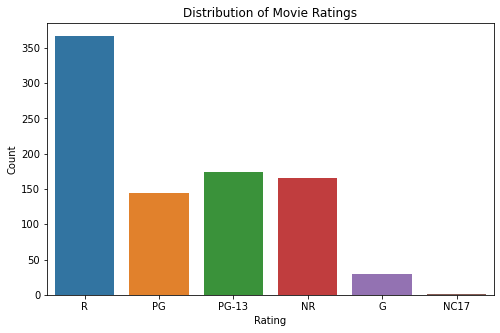

In [41]:
#Bar chart for Ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=rt_df, x='rating')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



From the above observation, The R rated movies are the majority amongst the majority of the movies.

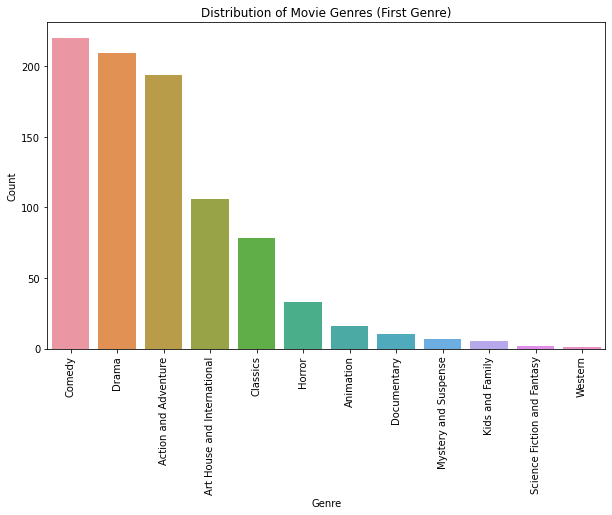

In [42]:
# Bar Chart for Genre 
plt.figure(figsize=(10, 6))
genre_counts = rt_df['genre'].str.split('|', expand=True)[0].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres (First Genre)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Here, we can see that Comedy, Drama and Action and Adventure are ranked the 3 highest Genre and Western ranked as the least Genre.

Now let's explore the tmdb.df dataset.

In [43]:
tmdb_df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


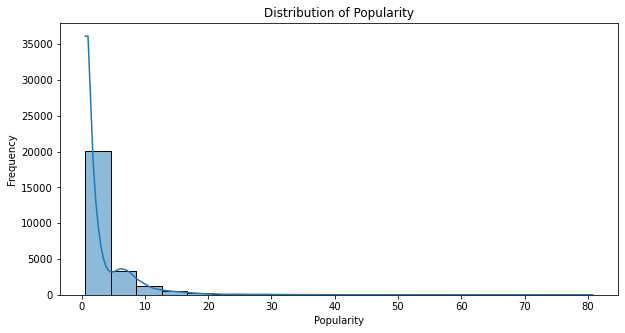

In [44]:
# Histogram for 'popularity'column
plt.figure(figsize=(10, 5))
sns.histplot(data=tmdb_df, x='popularity', kde=True, bins=20)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

The histogram is shaped based on the data distribution, indicating how many movies have popularity values.The histogram is skewed to the left which indicates that more movies have higher popularity values.

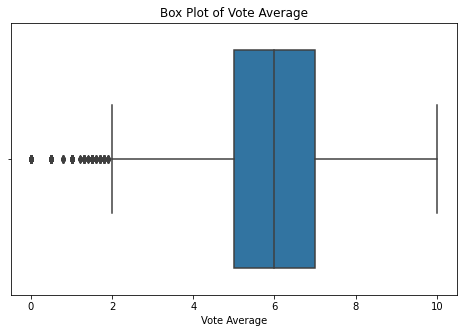

In [45]:
# Box Plot for 'vote_average'
plt.figure(figsize=(8, 5))
sns.boxplot(data=tmdb_df, x='vote_average')
plt.title('Box Plot of Vote Average')
plt.xlabel('Vote Average')
plt.show()

From the observation above, there many outliers in the Vote_average variable.

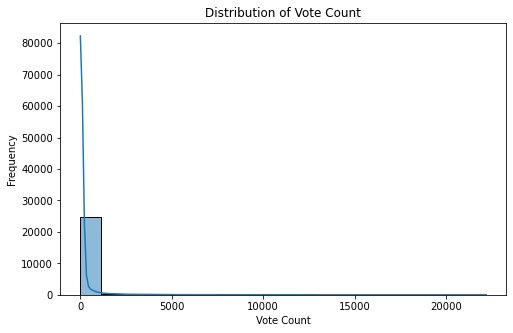

In [46]:
# Histogram for 'vote_count'
plt.figure(figsize=(8, 5))
sns.histplot(data=tmdb_df, x='vote_count', kde=True, bins=20)
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

For Vote Count ,the data shows a left-skewed shape indicating that more movies have higher vote counts.

Now let's explore the bom_df dataset.

In [47]:
bom_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


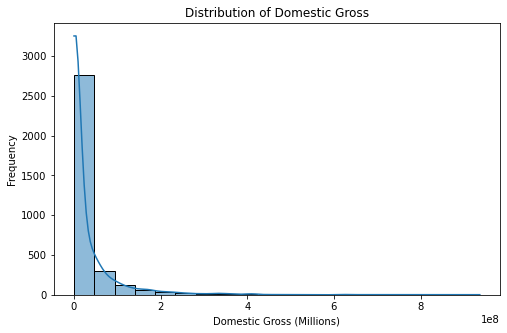

In [48]:
# Histogram for 'domestic_gross'
plt.figure(figsize=(8, 5))
sns.histplot(data=bom_df, x='domestic_gross', kde=True, bins=20)
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross (Millions)')
plt.ylabel('Frequency')
plt.show()

The shape of the histogram indicates the distribution of  how many movies achieved different levels of domestic gross revenue.

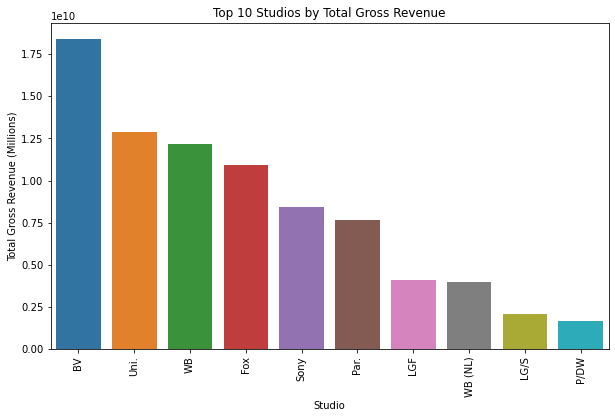

In [49]:
# Bar chart for top studios according to domestic_gross
top_studios = bom_df.groupby('studio')['domestic_gross'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_studios.index, y=top_studios.values)
plt.title('Top 10 Studios by Total Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Total Gross Revenue (Millions)')
plt.xticks(rotation=90)
plt.show()

Studio BV has displayed the highest number of Total Gross Revenue then Uni Studios followed by WB studios. The studio with the least Gross revenue is P/DW

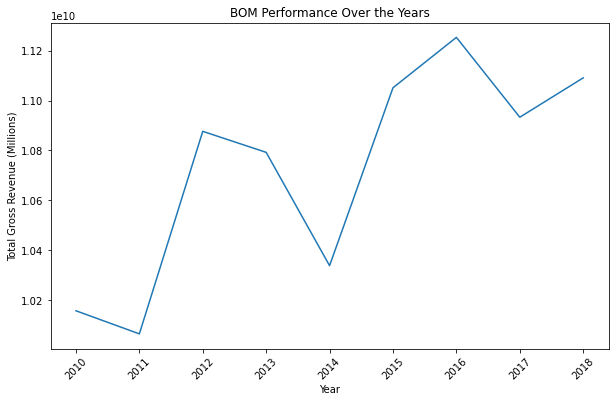

In [50]:
# Line plot to show bom performance over the years
yearly_gross = bom_df.groupby('year')['domestic_gross'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_gross.index, y=yearly_gross.values)
plt.title('BOM Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue (Millions)')
plt.xticks(rotation=45)
plt.show()

As seen above, In 2016 Bom movies performed great compared to other days. They poorly performed in 2011.

# EVALUATION

I would like to explore the data more by posing questions and figuring out the answer which will help get recommendation for the head of Microsoft studio.

# Question 1: Which genre of movie is profitable?

Two datasets will be involved while answering this question, The rt_df and bom_df.Here, I'll go ahead and Merge the two datasets using a common column. According to my datasets ,there is no common column but there are columns with the same values, which are    'theater_date'   from    rt_df    and   'year'  from   bom_df.

The date from the theater_date is formatted diffrently .Converting 'theater_date' to datetime and extract the year will help merge with the 'year' in bom_df.

In [51]:
#Merged_df = pd.merge(rt_df, bom_df,left_on=None ,how='inner')

In [52]:
#Converting the theater_date to year
rt_df['theater_date'] = pd.to_datetime(rt_df['theater_date'])
rt_df['year'] = rt_df['theater_date'].dt.year

In [53]:
#Merging the two dataset using year
merged_df = pd.merge(rt_df, bom_df, on='year', how='inner')
merged_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,year,title,studio,domestic_gross
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",108 minutes,2012,Marvel's The Avengers,BV,623400000.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",108 minutes,2012,Skyfall,Sony,304400000.0
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",108 minutes,2012,The Dark Knight Rises,WB,448100000.0
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",108 minutes,2012,The Hobbit: An Unexpected Journey,WB (NL),303000000.0
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",108 minutes,2012,Ice Age: Continental Drift,Fox,161300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59188,1832,First there was an opportunity......then there...,R,Drama,Danny Boyle,John Hodge,2017-03-17,"Jun 27, 2017",118 minutes,2017,Oro,Sony,5500.0
59189,1832,First there was an opportunity......then there...,R,Drama,Danny Boyle,John Hodge,2017-03-17,"Jun 27, 2017",118 minutes,2017,Singularity,VE,4200.0
59190,1832,First there was an opportunity......then there...,R,Drama,Danny Boyle,John Hodge,2017-03-17,"Jun 27, 2017",118 minutes,2017,Emily (2017),Hiber,3600.0
59191,1832,First there was an opportunity......then there...,R,Drama,Danny Boyle,John Hodge,2017-03-17,"Jun 27, 2017",118 minutes,2017,Max & Leon,Distrib.,500.0


Now after merging the two dataset ,Using a bar graph ,I will identify the genre that is most profitable. The merged data has the target variables that I will use to answer this question which were 'Genre' and 'domestic_gross'.

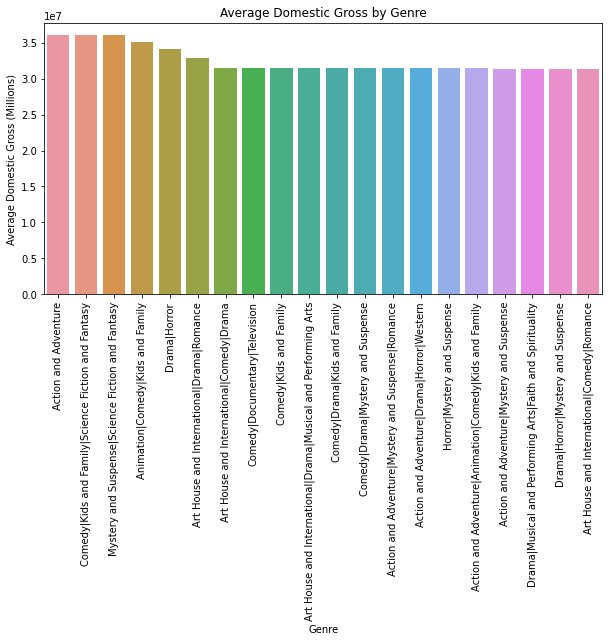

In [60]:
#Grouping data by genre and calculating the average domestic_gross for each genre
genre_profitability = merged_df.groupby('genre')['domestic_gross'].mean().sort_values(ascending=False)

#Getting the first 20 genres
top_10_genres = genre_profitability.head(20)

# Ploting a bar chart
plt.figure(figsize=(10,5))
sns.barplot(x= top_10_genres.index, y= top_10_genres.values)
plt.title('Average Domestic Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Domestic Gross (Millions)')
plt.xticks(rotation=90)
plt.show()

The 3 most profitable genres in the dataset are:

    Action and Adventure 
    Comedy|Kids and Family|Science Fiction and Fantasy 
    Mystery and Suspense|Science Fiction and Fantasy

# Question 2: Does the release date affect the Popularity and Reception of the movie?

By analyzing these visualizations, I can determine if there are any noticeable trends or patterns between the release date and the popularity of movies.Here we will use the tmdb_df which contains our target variables ,'release_date','popularity' and 'vote_counts'

First, we convert the 'release_date' column to a datetime format.

In [56]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Extract the release month from the 'release_date' column
tmdb_df['release_month'] = tmdb_df['release_date'].dt.month

Then,calculate the number of movie releases for each month and calculate the average popularity for movies released in each month.

In [58]:

#Calculating the number of movies per month
release_count_by_month = tmdb_df['release_month'].value_counts().sort_index()

#Calculating the average popularity for each movie
average_popularity_by_month = tmdb_df.groupby('release_month')['popularity'].mean().sort_index()

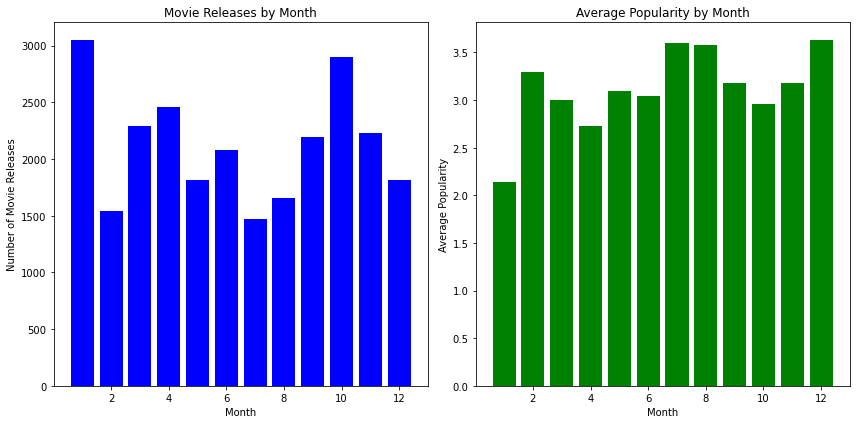

In [59]:
plt.figure(figsize=(12, 6))

# Bar plot for release count by month
plt.subplot(1, 2, 1)
plt.bar(release_count_by_month.index, release_count_by_month.values, color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Movie Releases')
plt.title('Movie Releases by Month')

# Bar plot for average popularity by month
plt.subplot(1, 2, 2)
plt.bar(average_popularity_by_month.index, average_popularity_by_month.values, color='green')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Month')

plt.tight_layout()
plt.show()

From the bar charts above,  On the 7th Month,  July  ,average popularity was high and thats when few movies were released.

In January,the number of movies released was highest and yet the average populariy for those movies was low.

# Question 3: Who are the most successful directors in terms of box office revenue?

Here, I want to see the 10 most successful directors based on the box office revenue.Then, I plot a bar chart to visualize the total box office revenue for the top 10 directors.

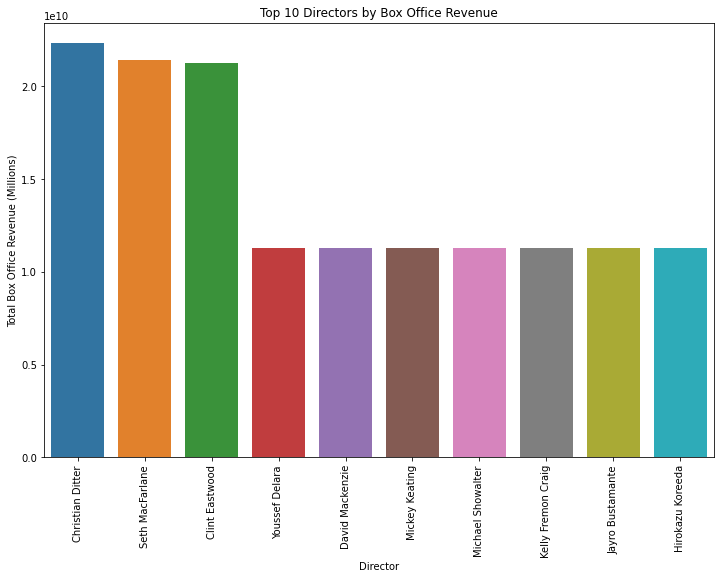

In [62]:
director_revenue = merged_df.groupby('director')['domestic_gross'].sum().sort_values(ascending=False)

# Selecting the top 10 directors with the highest box office revenue
top_10_directors = director_revenue.head(10)

# Plot a bar chart to visualize the total box office revenue for the top 10 directors
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values)
plt.title('Top 10 Directors by Box Office Revenue')
plt.xlabel('Director')
plt.ylabel('Total Box Office Revenue (Millions)')
plt.xticks(rotation=90)
plt.show()

From the above bar chart, Christian Ditter is the most successful director, followed by Seth MacFarlane and then Clint Eastwood. Their revenue from the box office is above 2 million.

# Question 4: Does popularity result in high votes?

 Lastly,Let's check the tmdb_df again and see the correlation between the variables.

In [64]:
#Checking correlation
tmdb_df.corr()

,id,popularity,vote_average,vote_count,release_month
id,1.000000,-0.151993,0.119240,-0.134912,0.031274
popularity,-0.151993,1.000000,0.057178,0.685285,0.063234
vote_average,0.119240,0.057178,1.000000,0.079160,0.006887
vote_count,-0.134912,0.685285,0.079160,1.000000,0.040635
release_month,0.031274,0.063234,0.006887,0.040635,1.000000


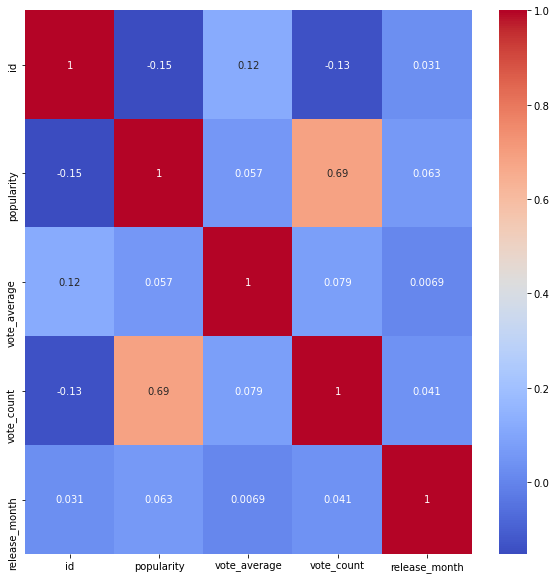

In [65]:
#Plotting the correlation using seaborns' heatmap
plt.figure(figsize=(10,10))
sns.heatmap(tmdb_df.corr(),annot=True,cmap='coolwarm')
plt.show()

As i can see,there is a significant correlation between popularity and vote_count.

Let's explore more on this using the variables popularity and vote_count

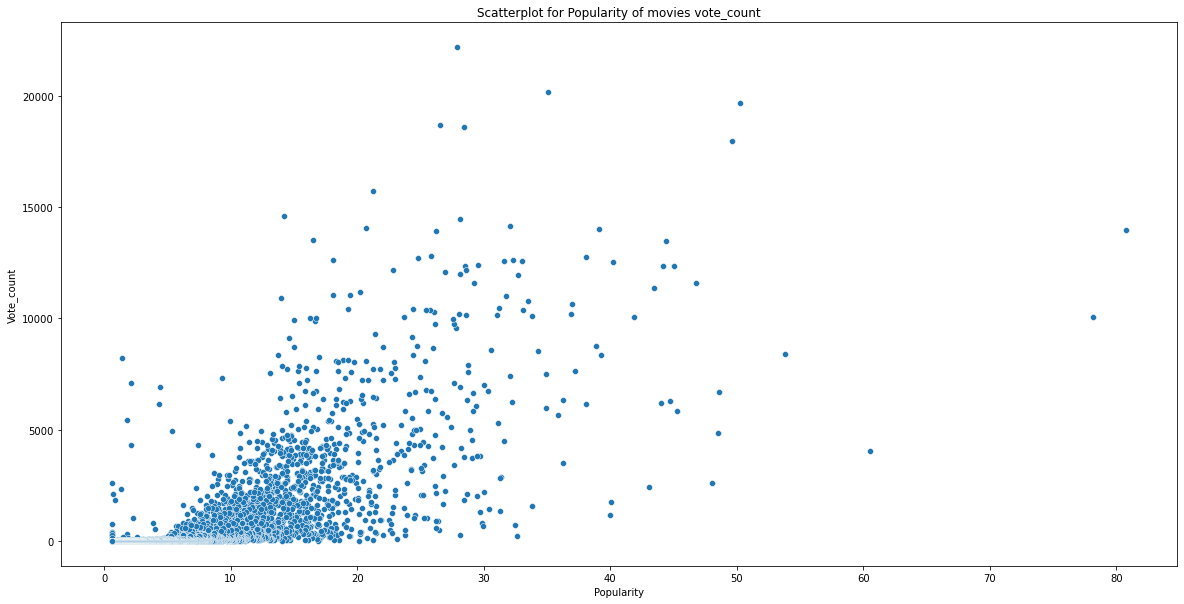

In [67]:
#Check popularity vs vote_count visually
plt.figure(figsize =(20,10))
plt.title('Scatterplot for Popularity of movies vote_count')
sns.scatterplot(x= tmdb_df.popularity,y=tmdb_df.vote_count)
plt.xlabel('Popularity')
plt.ylabel('Vote_count')
plt.show()

From the visualization above, there is a Strong Positive correlation between the popularity and vote_count. The popular the movie the higher the vote_count. 

# CONCLUSIONS

Below are reccommendations for the Microsoft studio to consider based on the analysis done above:

1. Genre Profitability: Based on the analysis of average domestic gross by genre, I found that certain genres are more profitable than others. The business should focus on producing movies in genres that have higher average domestic gross to maximize revenue.

2. Most Successful Directors: By analyzing the total box office revenue for directors, I identified the top 10 most successful directors in terms of box office performance. The business could consider collaborating more frequently with these directors to increase the chances of producing successful movies.

3.  Release Date and Popularity/Reception: The analysis of release date in relation to popularity and vote_average provides insights into whether specific months or years are more favorable for movie releases. 

4. Positive Correlation: The analysis indicates that there is a positive correlation between popularity and votes. Movies that are more popular tend to receive higher vote counts.  A good storyline, great visuals, and strong performances can contribute to a movie's vote_count. Grand Movie Premiers,Social Media, Infuencers and budgeting on marketing the movie will help increase the popularity of the movies.

Below are the limitations:


1. Missing Data: The presence of missing data, particularly in runtime,currency, studio and box office, might have affected the accuracy of our analysis and conclusions.

2. External Factors: The profitability of genres, success of directors, and reception of movies can be influenced by external factors such as marketing strategies, competition, economic conditions, and cultural trends. These factors were not explicitly considered in the analysis.

In the future, there are several ways to improve this project and further enhance the analysis:


1. Include More Data: Expand the dataset by incorporating additional relevant data, such as movie budgets, marketing expenses, and audience demographics. More comprehensive data will provide deeper insights into the factors that influence a movie's success.

2. Predictive Modeling: Develop predictive models to forecast movie performance based on various features like genre, director, release date, and audience reception. This can help in decision-making and assist in making strategic investments in potential movies.